In [1]:
import pandas as pd


In [3]:
df = pd.read_csv('un-country-data.csv')
df

C:\Users\ipekt\AppData\Local\Temp\ipykernel_16396\1750837984.py:1: DtypeWarning: Columns (2,3,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('un-country-data.csv')


,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,...,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
0,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADB region: Central and West Asia,...,654.5798,631.8067,297.6529,298.4483,297.2079,443.3215,457.3384,427.3167,201.196,2.907
1,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADB region: Central and West Asia,...,642.5944,619.1788,292.4375,293.1236,292.0887,436.9979,451.4368,420.7398,195.070,2.760
2,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADB region: Central and West Asia,...,630.8166,607.6061,286.6916,287.3395,286.3341,429.8298,444.5151,413.5565,182.671,2.529
3,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADB region: Central and West Asia,...,619.9937,596.2667,281.4671,282.0251,281.1446,423.2008,438.1189,406.9265,164.189,2.222
4,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADB region: Central and West Asia,...,610.3878,586.3428,276.8312,277.5799,276.2557,417.3453,432.7454,400.7629,163.064,2.157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84355,326.0,876,2.0,WLF,WF,876.0,4.0,Country/Area,957.0,Wallis and Futuna Islands,...,29.4343,35.8025,9.6232,8.1477,11.1791,26.9260,25.8335,28.0762,-0.001,-0.126
84356,326.0,876,2.0,WLF,WF,876.0,4.0,Country/Area,957.0,Wallis and Futuna Islands,...,29.0008,35.3848,9.4943,8.0242,11.0440,26.5634,25.4456,27.7401,-0.001,-0.103
84357,326.0,876,2.0,WLF,WF,876.0,4.0,Country/Area,957.0,Wallis and Futuna Islands,...,28.5670,34.9669,9.3653,7.9008,10.9090,26.2007,25.0576,27.4040,-0.001,-0.109
84358,326.0,876,2.0,WLF,WF,876.0,4.0,Country/Area,957.0,Wallis and Futuna Islands,...,28.3501,34.5488,9.2681,7.8390,10.7740,25.9376,24.8635,27.0678,-0.001,-0.168


In [10]:
countries = df[df['ISO3_code'].notnull()]
columns = ['Location', 'ISO3_code', 'Time','TPopulation1Jan', 'TPopulation1July']
clean_df = countries[columns]
clean_df.to_csv('cleaned-un-country-data.csv', index=False)
print("Data cleaned and saved to 'cleaned-un-country-data.csv'")

Data cleaned and saved to 'cleaned-un-country-data.csv'


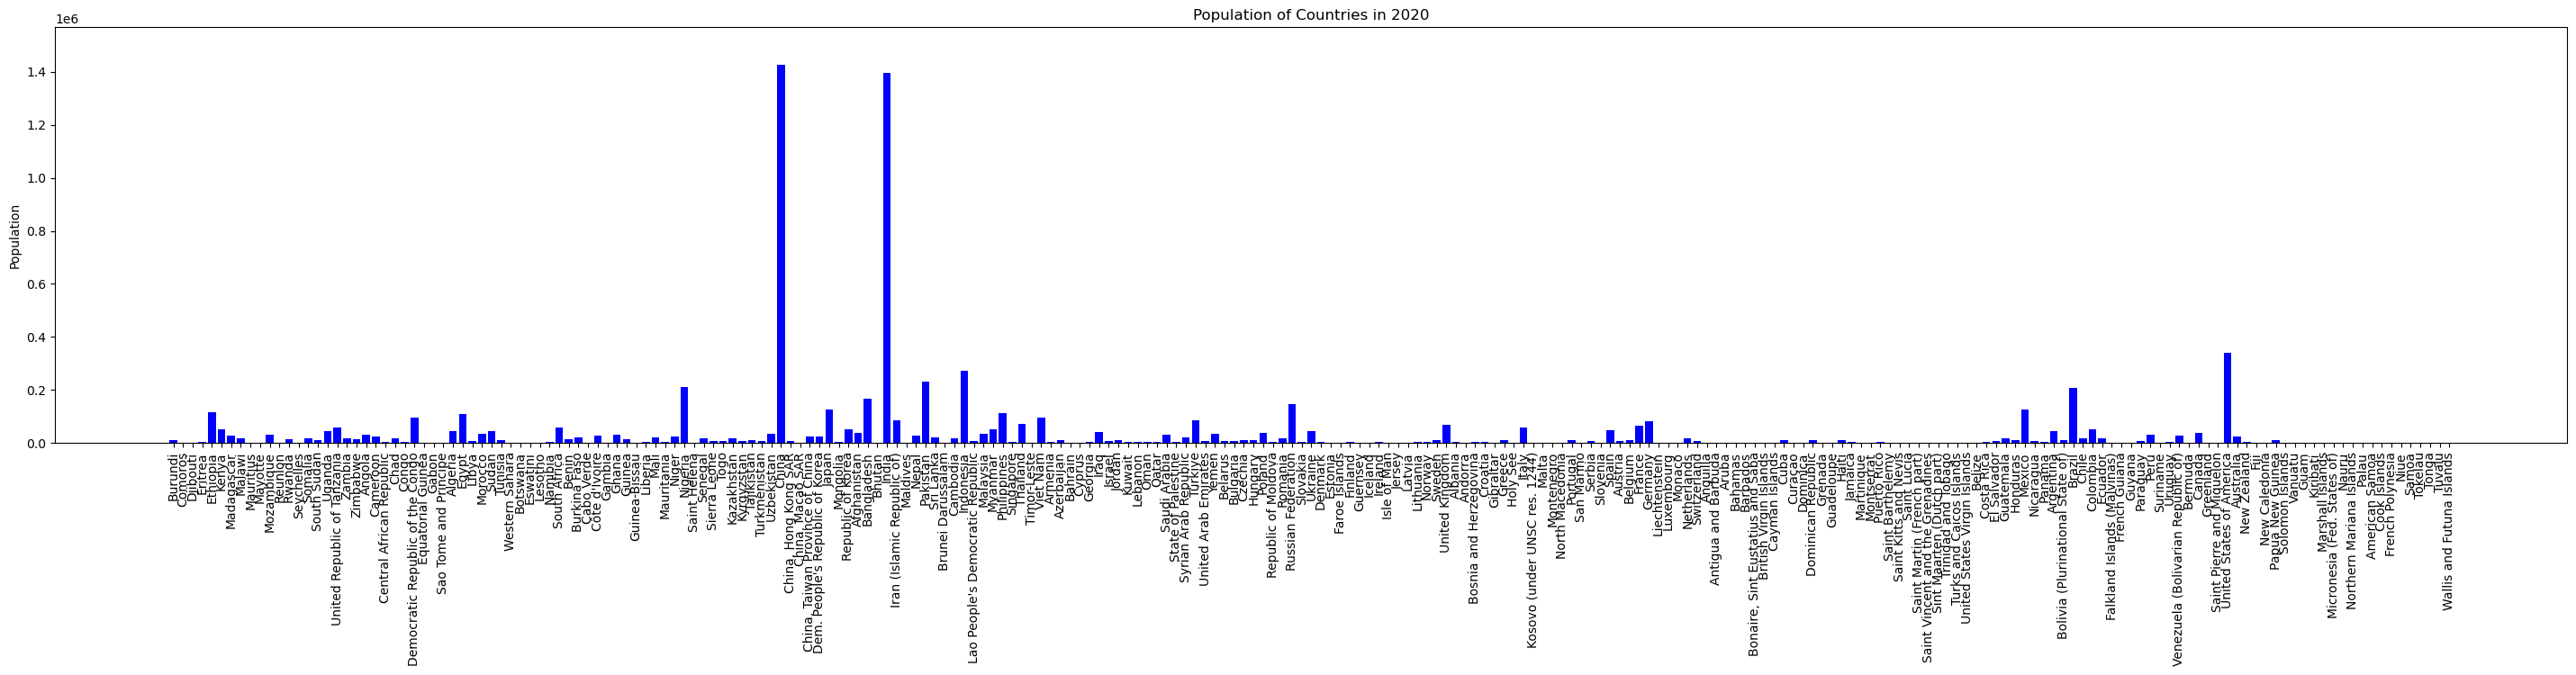

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# load the data
pop_data = pd.read_csv('cleaned-un-country-data.csv')
# filter the data for the year 2020
pop_data_2020 = pop_data[pop_data['Time'] == 2020]
# create a figure and axis
fig, ax = plt.subplots(figsize=(36, 6))
# set the title and labels
ax.set_title('Population of Countries in 2020')
ax.set_xlabel('')
ax.set_ylabel('Population')
# set the x-ticks to the country names
ax.set_xticks(range(len(pop_data_2020['Location'])))
ax.set_xticklabels(pop_data_2020['Location'], rotation=90)
# set the y-axis limit
ax.set_ylim(0, pop_data_2020['TPopulation1Jan'].max() * 1.1)
# create a bar chart
bars = ax.bar(pop_data_2020['Location'], pop_data_2020['TPopulation1Jan'], color='blue')

<BarContainer object of 10 artists>

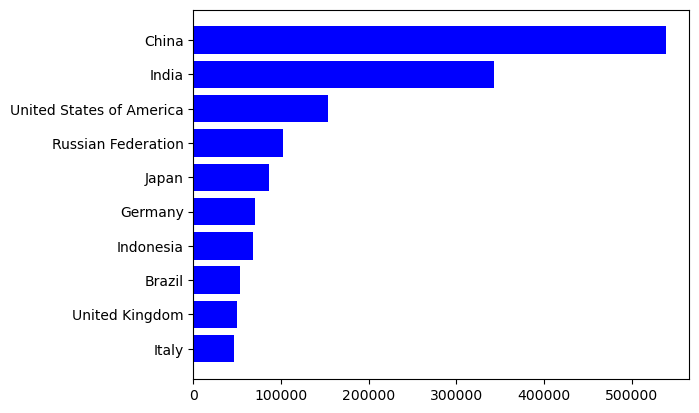

In [23]:
pop_data_1950 = pop_data[pop_data['Time'] == 1950]
top_pop_1950 = pop_data_1950.nlargest(10, 'TPopulation1Jan').sort_values(by='TPopulation1Jan', ascending=True)
top_pop_1950
plt.barh(top_pop_1950['Location'], top_pop_1950['TPopulation1Jan'], color='blue')